In [26]:
!pip install yfinance


In [27]:
import yfinance as yf

# Define the stock symbol and the time period
ticker_symbol = 'TSLA'
start_date = '2022-01-01'
end_date = '2024-01-01'

# Download the stock data
tesla_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Display the first few rows of the data
print(tesla_data.head())


[*********************100%***********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-03  382.583344  400.356659  378.679993  399.926666  399.926666   
2022-01-04  396.516663  402.666656  374.350006  383.196655  383.196655   
2022-01-05  382.216675  390.113342  360.336670  362.706665  362.706665   
2022-01-06  359.000000  362.666656  340.166656  354.899994  354.899994   
2022-01-07  360.123322  360.309998  336.666656  342.320007  342.320007   

               Volume  
Date                   
2022-01-03  103931400  
2022-01-04  100248300  
2022-01-05   80119800  
2022-01-06   90336600  
2022-01-07   84164700  


In [28]:
import yfinance as yf

# Define the stock symbol and the time period
ticker_symbol = 'TSLA'
start_date = '2022-01-01'
end_date = '2024-01-01'

# Download the stock data
tesla_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Save the data to a CSV file
tesla_data.to_csv('tesla_stock_data_2022_2024.csv')

print("Data downloaded and saved as 'tesla_stock_data_2022_2024.csv'")


[*********************100%***********************]  1 of 1 completed

Data downloaded and saved as 'tesla_stock_data_2022_2024.csv'


In [29]:
print(tesla_data.head())    # First few rows
print(tesla_data.info())    # Data types and non-null counts
print(tesla_data.describe()) # Summary statistics


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-03  382.583344  400.356659  378.679993  399.926666  399.926666   
2022-01-04  396.516663  402.666656  374.350006  383.196655  383.196655   
2022-01-05  382.216675  390.113342  360.336670  362.706665  362.706665   
2022-01-06  359.000000  362.666656  340.166656  354.899994  354.899994   
2022-01-07  360.123322  360.309998  336.666656  342.320007  342.320007   

               Volume  
Date                   
2022-01-03  103931400  
2022-01-04  100248300  
2022-01-05   80119800  
2022-01-06   90336600  
2022-01-07   84164700  
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 501 entries, 2022-01-03 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       501 non-null    float64
 1   High       501 non-null    float64
 2   Low        501 non-null  

In [30]:
tesla_data.isnull().sum()   # Check for missing values
tesla_data = tesla_data.fillna(method='ffill')  # Forward fill missing values


<ipython-input-30-df2a59714e7b>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  tesla_data = tesla_data.fillna(method='ffill')  # Forward fill missing values


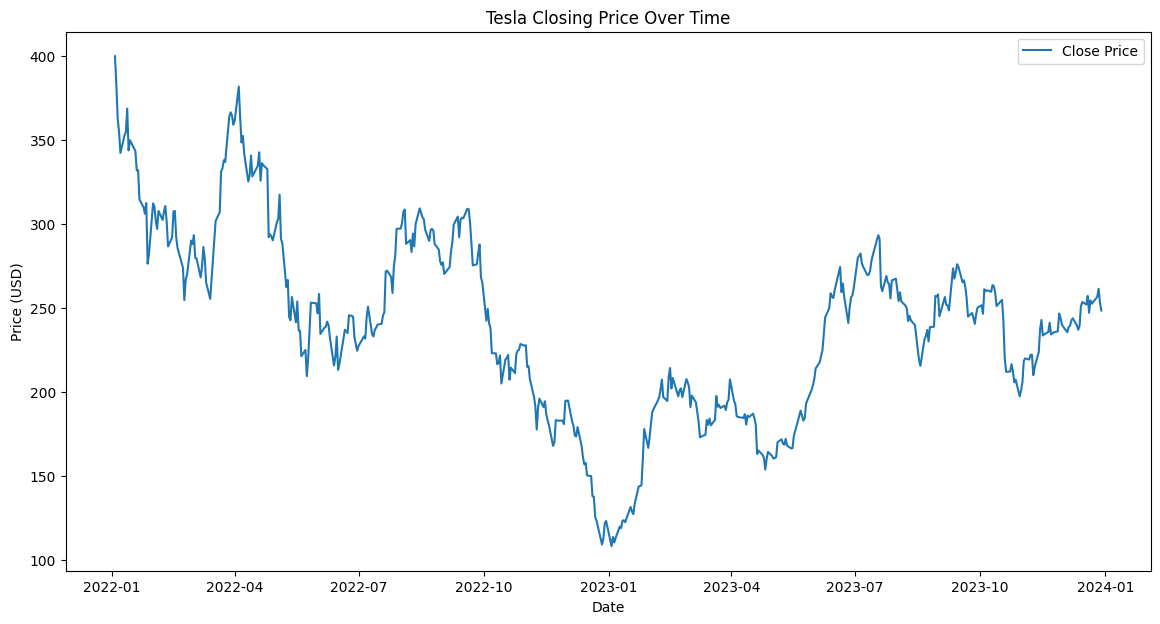

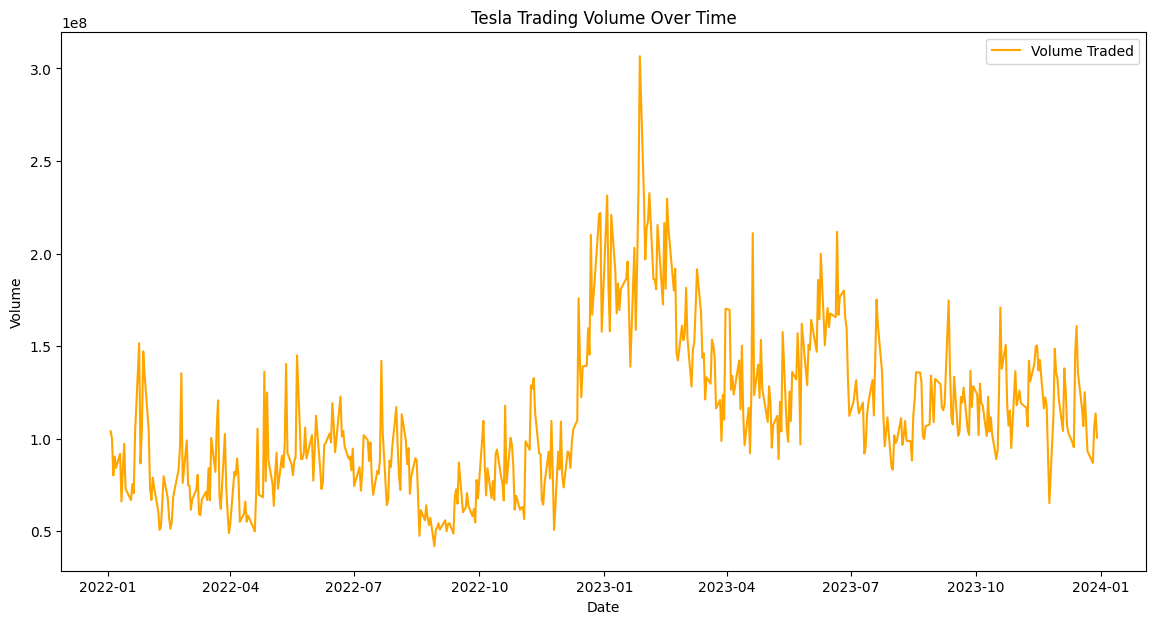

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(tesla_data['Close'], label='Close Price')
plt.title('Tesla Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(tesla_data['Volume'], label='Volume Traded', color='orange')
plt.title('Tesla Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()


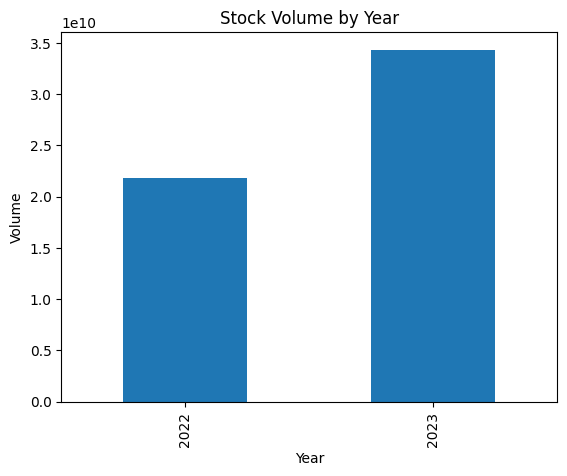

In [32]:
tesla_data['Year'] = tesla_data.index.year
stockSum = tesla_data.groupby('Year')['Volume'].sum()
#average
stockMean = tesla_data.groupby('Year')['Volume'].mean()

stockSum.plot(kind='bar')
plt.title('Stock Volume by Year')
plt.xlabel('Year')
plt.ylabel('Volume')
plt.show()


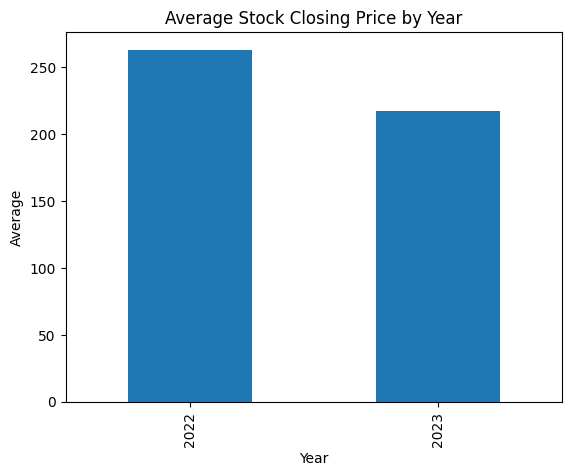

In [33]:
stockSum = tesla_data.groupby('Year')['Close'].sum()
#average
stockMean = tesla_data.groupby('Year')['Close'].mean()

stockMean.plot(kind='bar')
plt.title('Average Stock Closing Price by Year')
plt.xlabel('Year')
plt.ylabel('Average')
plt.show()



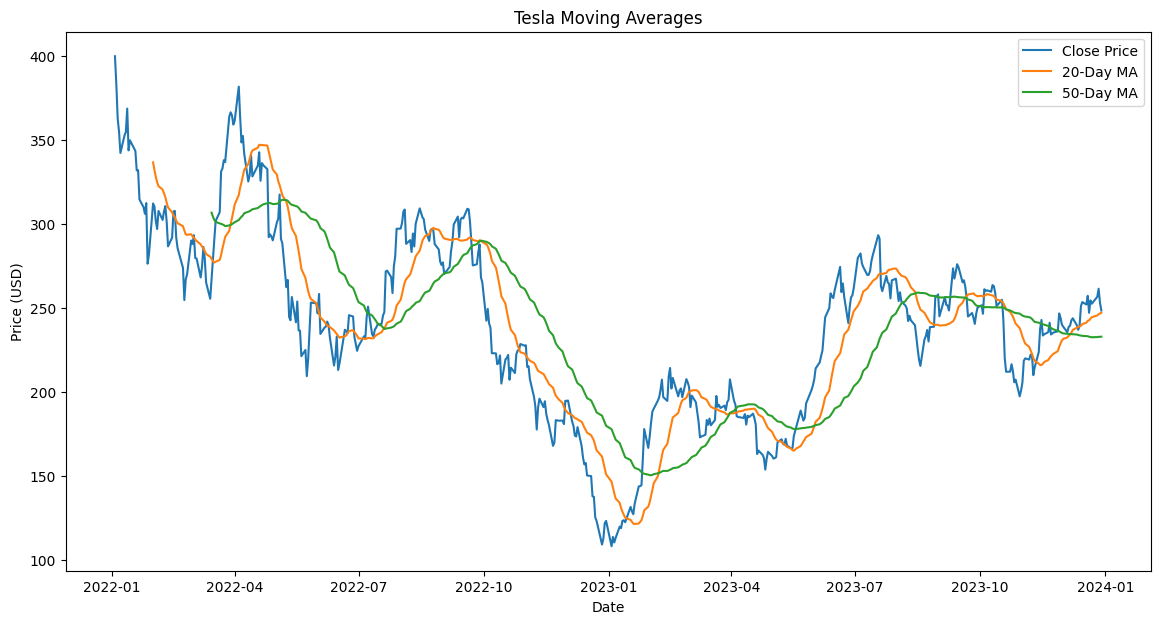

In [34]:
tesla_data['20_MA'] = tesla_data['Close'].rolling(window=20).mean()
tesla_data['50_MA'] = tesla_data['Close'].rolling(window=50).mean()

plt.figure(figsize=(14, 7))
plt.plot(tesla_data['Close'], label='Close Price')
plt.plot(tesla_data['20_MA'], label='20-Day MA')
plt.plot(tesla_data['50_MA'], label='50-Day MA')
plt.title('Tesla Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


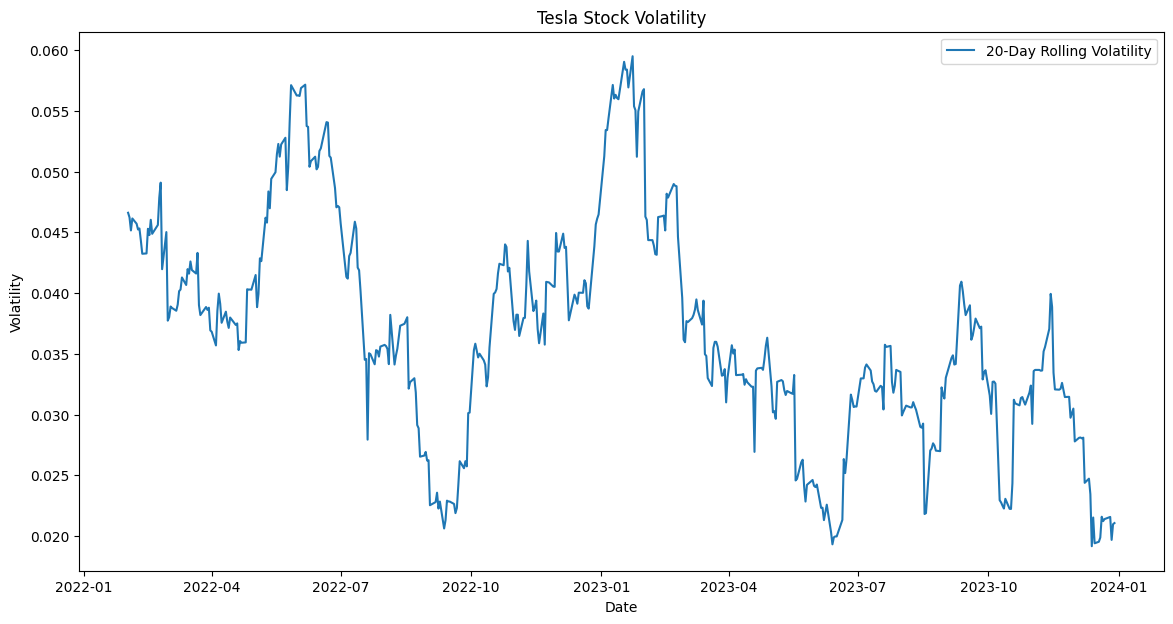

In [35]:
tesla_data['Daily_Return'] = tesla_data['Close'].pct_change()
tesla_data['Volatility'] = tesla_data['Daily_Return'].rolling(window=20).std()

plt.figure(figsize=(14, 7))
plt.plot(tesla_data['Volatility'], label='20-Day Rolling Volatility')
plt.title('Tesla Stock Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


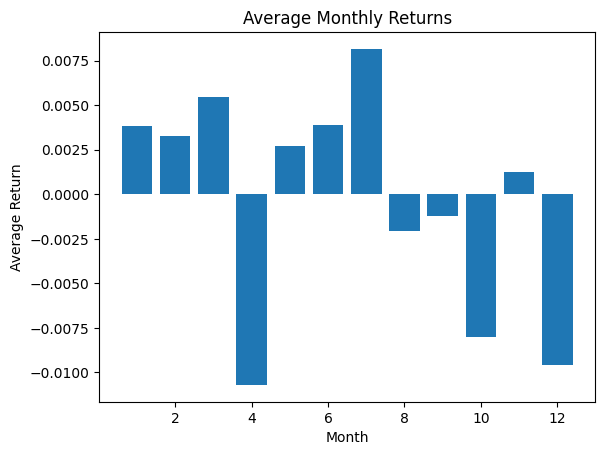

In [36]:
tesla_data['Month'] = tesla_data.index.month
monthly_avg = tesla_data.groupby('Month')['Daily_Return'].mean()
plt.bar(monthly_avg.index, monthly_avg)
plt.title('Average Monthly Returns')
plt.xlabel('Month')
plt.ylabel('Average Return')
plt.show()


In [37]:
import numpy as np

# Calculate daily returns
tesla_data['Daily_Return'] = tesla_data['Close'].pct_change()

# Calculate Z-scores of daily returns
tesla_data['Return_Z_Score'] = (tesla_data['Daily_Return'] - tesla_data['Daily_Return'].mean()) / tesla_data['Daily_Return'].std()

# Identify extreme movements: Z-score threshold (e.g., |Z| > 2)
tesla_data['Extreme_Movement'] = np.where(np.abs(tesla_data['Return_Z_Score']) > 2, 'Yes', 'No')

# Display the extreme movements
extreme_movements = tesla_data[tesla_data['Extreme_Movement'] == 'Yes']
print(extreme_movements[['Close', 'Daily_Return', 'Return_Z_Score', 'Extreme_Movement']])


                 Close  Daily_Return  Return_Z_Score Extreme_Movement
Date                                                                 
2022-01-27  276.366669     -0.115542       -3.042092              Yes
2022-01-31  312.239990      0.106776        2.822978              Yes
2022-03-22  331.326660      0.079052        2.091587              Yes
2022-03-28  363.946655      0.080345        2.125689              Yes
2022-04-26  292.140015     -0.121841       -3.208281              Yes
2022-05-05  291.093323     -0.083286       -2.191142              Yes
2022-05-09  262.369995     -0.090729       -2.387508              Yes
2022-05-11  244.666672     -0.082546       -2.171611              Yes
2022-06-03  234.516663     -0.092194       -2.426134              Yes
2022-06-16  213.100006     -0.085408       -2.247112              Yes
2022-06-21  237.036667      0.093544        2.473905              Yes
2022-07-21  271.706665      0.097805        2.586299              Yes
2022-10-03  242.3999